In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print(train_images[0].shape)
print(train_images[0])

11501568/11490434 [==============================] - 0s 0us/step
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 5ms/step - loss: 0.1610 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0251 - accuracy: 0.9920


In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0310 - accuracy: 0.9898 - 1s/epoch - 4ms/step


In [7]:
print(test_acc)

0.989799976348877


In [ ]:
 9 * 32 + 32
 

320

In [ ]:
9*32*64+64

18496

In [8]:
print(model.layers[2].name)


conv2d_1


In [9]:
idx = 2

In [10]:
len(model.layers[idx].get_weights())

2

In [11]:
model.layers[idx].get_weights()

[array([[[[-0.08840013, -0.4129215 , -0.01066344, ...,  0.02310237,
            0.17134173, -0.1128739 ],
          [ 0.02802663, -0.33587813, -0.06952409, ..., -0.01544049,
           -0.12230048,  0.13619325],
          [ 0.07442711, -0.37534353,  0.00591577, ..., -0.02973261,
            0.10845981, -0.01407252],
          ...,
          [-0.06355144, -0.07335353, -0.11156084, ...,  0.16715448,
           -0.0283556 , -0.10967758],
          [-0.11884391, -0.46810374, -0.06111385, ...,  0.13855481,
            0.13978447,  0.00889523],
          [-0.06794073, -0.07377185, -0.03261374, ...,  0.0217087 ,
           -0.07503188,  0.11821808]],
 
         [[-0.00753252, -0.1820618 , -0.01847227, ..., -0.34031385,
            0.19399598,  0.00914305],
          [ 0.06534413, -0.20844436, -0.09300255, ...,  0.1804385 ,
           -0.16133304,  0.08909828],
          [ 0.11915404, -0.08104242,  0.0528699 , ..., -0.03956023,
           -0.03617885, -0.0561036 ],
          ...,
          [-0

In [ ]:
model.layers[idx].get_weights()[0].shape, model.layers[idx].get_weights()[1].shape

((3, 3, 32, 64), (64,))

In [12]:
import numpy as np
h = model.layers[idx].output
h

<KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
train_images[0].shape, np.expand_dims(train_images[0], axis = 0).shape


((28, 28, 1), (1, 28, 28, 1))

In [13]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = h)
activations = activation_model.predict(np.expand_dims(train_images[0], axis = 0))
activations[0].shape

(11, 11, 64)

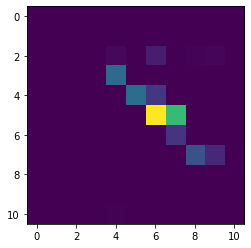

In [14]:
import matplotlib.pyplot as plt
plt.imshow(activations[0][:,:,63])
plt.show()

In [16]:
feature = activations[0].sum(axis = 2)
feature.shape

(11, 11)

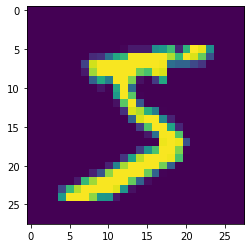

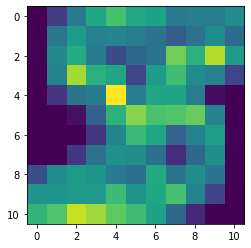

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()
plt.imshow(feature)
plt.show()